In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.cluster import DBSCAN, OPTICS
from sklearn.preprocessing import StandardScaler
from math import exp
import hdbscan

In [7]:
# Returns lists of start time, duration and location of a given activity in given dataset

def get_activity_data(dataset, activity):
    read_path = r'..\CASAS_DATA' + '\HH' + dataset + '\Activities' + '\\' + activity + '.csv'
  
    df = pd.read_csv(read_path)
    start = list(df['Start_Time'])
    dur = list(df['Duration'])
    loc = list(df['Location'])
    return start, dur, loc

In [8]:
def processData(df):
    data = df[['Start_Time', 'Duration']]
    data = data.values.astype('float32', copy=False)
    return data

def scaleData(data):
    scaler = StandardScaler().fit(data)
    scaled_data = scaler.transform(data)
    return scaled_data

def clustering(df, r, mp, method):
    data = processData(df)
    X = scaleData(data)
    model = None
    if method == 'optics':
        model = OPTICS(min_cluster_size=r, min_samples=mp, metric = 'euclidean', cluster_method='xi').fit(X)
    else:
        model = hdbscan.HDBSCAN(min_cluster_size=r, min_samples=mp, metric='euclidean').fit(X)

    if -1 in set(model.labels_):
        clusters = len(set(model.labels_)) -1
    else:
        clusters = len(set(model.labels_))

    A = []
    for i in range(clusters):
        a = data[model.labels_ == i]
        A.append(a)
    return A

In [9]:

def avg(A):
    a = sum(A)/len(A)
    a = float('%.2f'%a)
    return a

def Min(A):
    a = min(A)
    a = float('%.2f'%a)
    return a

def Max(A):
    a = max(A)
    a = float('%.2f'%a)
    return a

In [10]:
def by_datasets(Datasets, activity):

    Start = []
    Duration = []
    Location = []

    for dataset in Datasets:
        
        s, d, l = get_activity_data(dataset, activity)
        Start.extend(s)
        Duration.extend(d)
        Location.extend(l)
    
    data = pd.DataFrame({
        'Start_Time': Start,
        'Duration': Duration,
        'Location': Location
    })
    
    return data

def toStartDuration(A):
    X = []
    Y = []
    for i in range(len(A)):
        X.append(A[i][0])
        Y.append(A[i][1])

    return X, Y
   
def plot_clusters(O, D, title='None'):
    colors = 10*['red', 'orange', 'purple', 'green', 'blue', 'black']
    c = 0        
    fig, (optics, dbscan) = plt.subplots(1, 2)
    fig.set_figwidth(15)
    fig.set_figheight(4)
    fig.suptitle(title, fontsize=20)
    
    for o in O:
        X, Y = toStartDuration(o)
        optics.scatter(X, Y)
        c += 1
    optics.set_xlabel('Start Time (Hours)')
    optics.set_ylabel('Duration (mins)')
    optics.set_title('OPTICS')
    
    c = 0
    for d in D:
        X, Y = toStartDuration(d)
        dbscan.scatter(X, Y)
        c += 1
        
    dbscan.set_xlabel('Start Time (Hours)')
    dbscan.set_ylabel('Duration (mins)')
    dbscan.set_title('HDBSCAN')



In [11]:

eat = ['Eat', 'Eat_Breakfast', 'Eat_Lunch', 'Eat_Dinner']
sleep = ['Sleep']
med = ['Morning_Meds', 'Evening_Meds','Medicine','Take_Medicine']
A = {'Eat': eat,  'Sleep': sleep, 'Medicine': med}



In [14]:

def plot_datasets(Datasets):
    multiplier = len(Datasets)
    
    Activities = ['Sleep', 'Medicine', 'Eat']
    
    min_samples = {'Sleep': 35, 'Eat': 25, 'Medicine': 24}
    min_pts =  {'Sleep': 20, 'Eat': 20, 'Medicine': 45}
    
    Normal = []
    for activity in Activities:
        data = by_datasets(Datasets, activity)
        locations = list(data['Location'])
        optic_clusters = clustering(data, min_samples[activity], min_pts[activity], 'optics')
        dbscan_clusters = clustering(data, min_samples[activity], min_pts[activity], 'hdbscan')
        
        plot_clusters(optic_clusters, dbscan_clusters, activity)
        


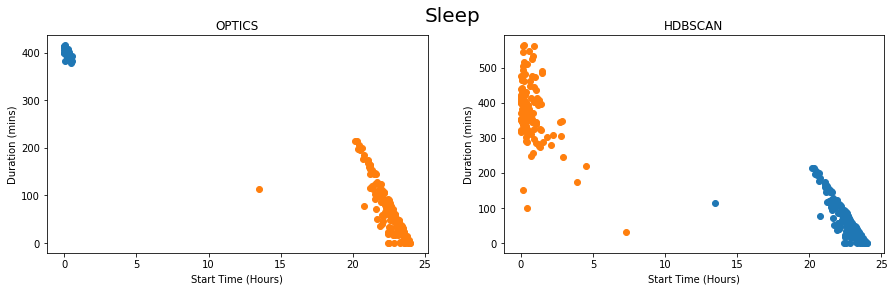

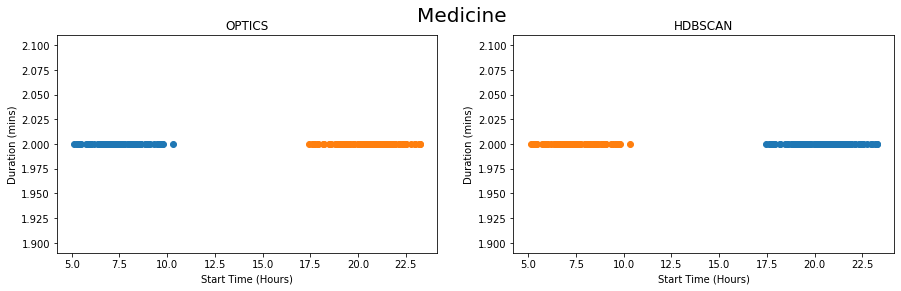

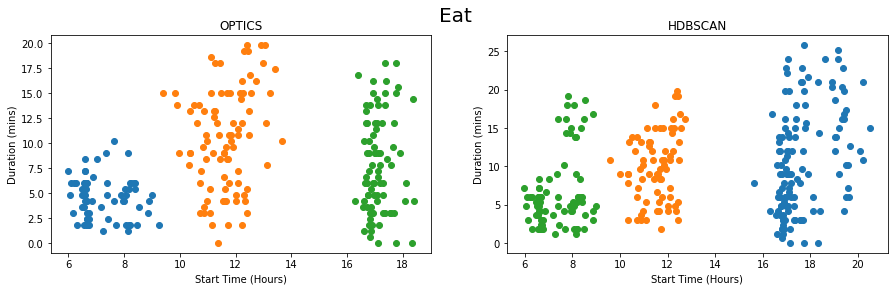

In [15]:
dataset = ['109','106', '118', '128']
plot_datasets(dataset)

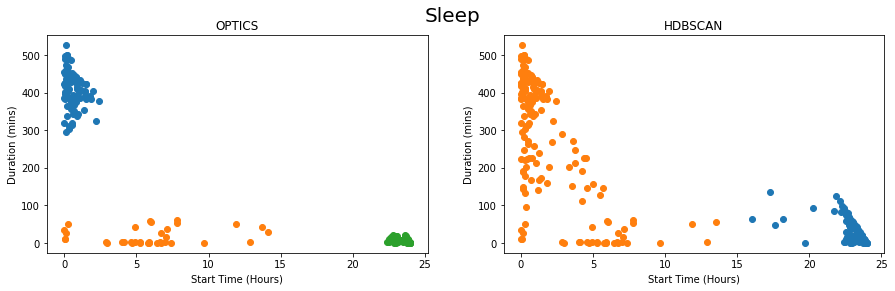

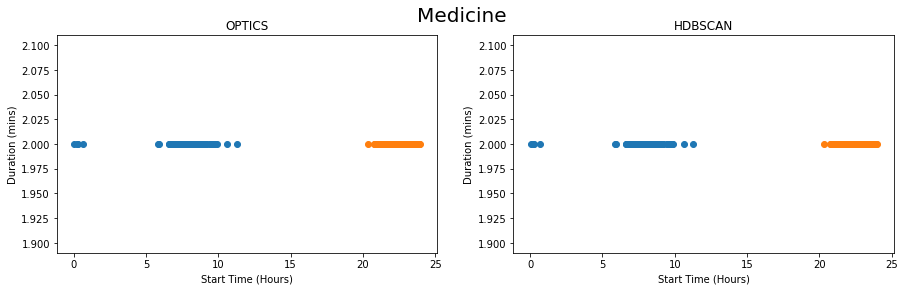

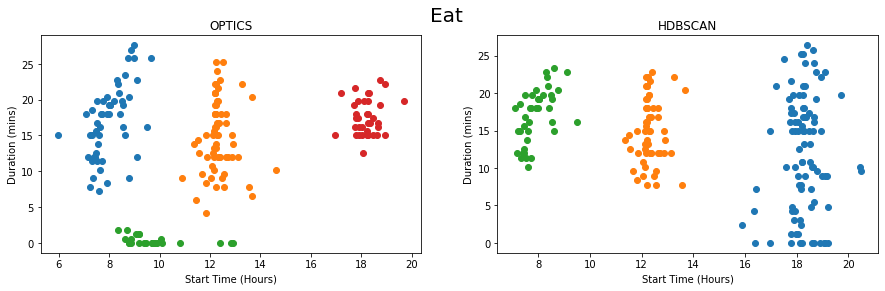

In [16]:
dataset = ['111','103','116']
plot_datasets(dataset)

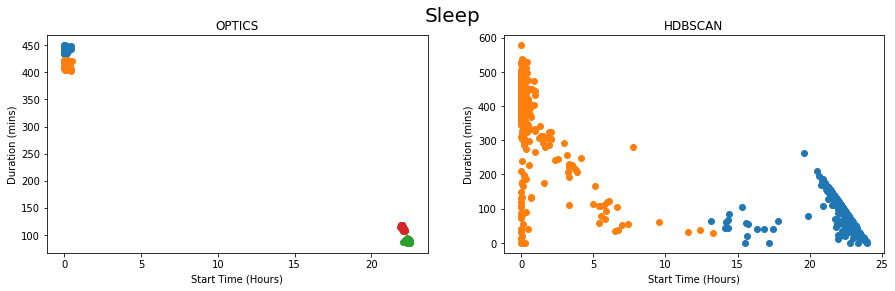

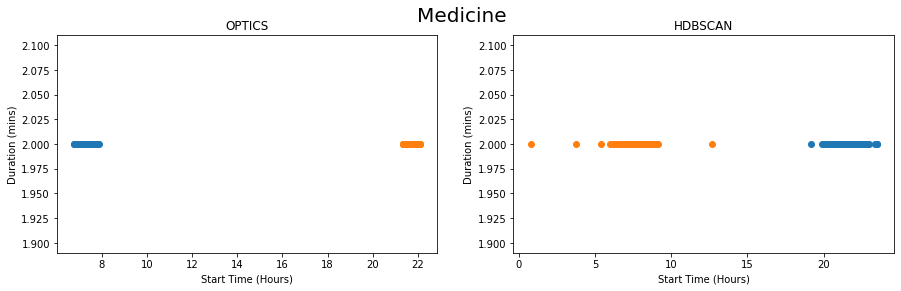

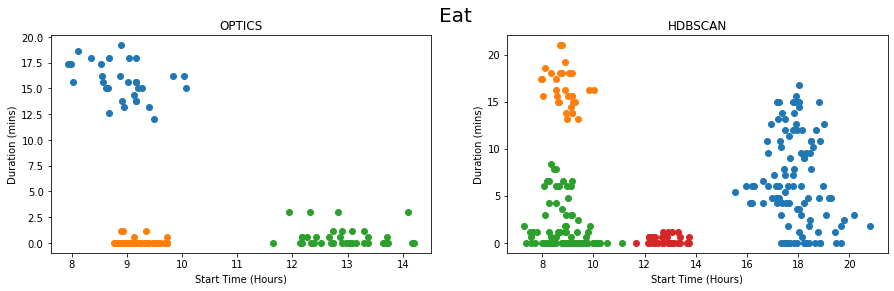

In [17]:
dataset = ['122','115','112','127']
plot_datasets(dataset)

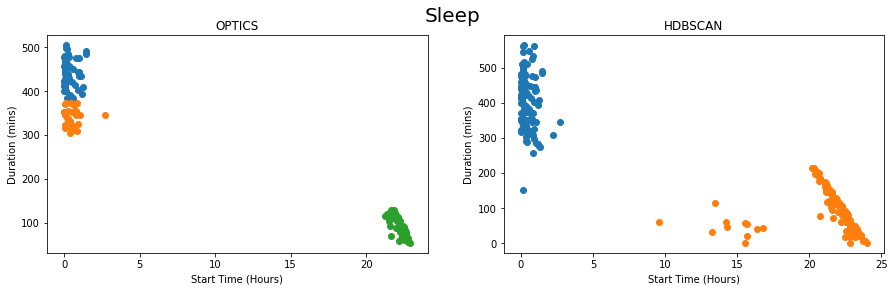

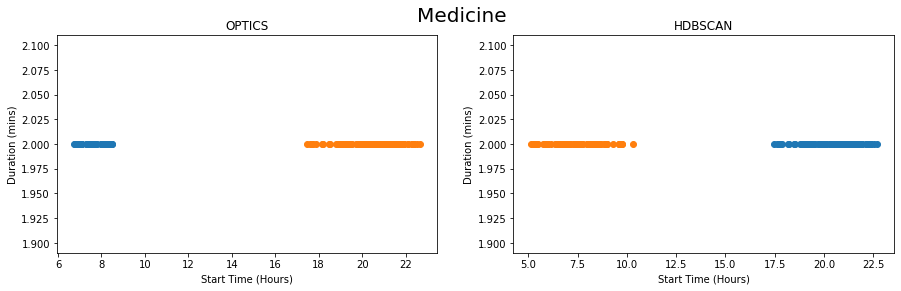

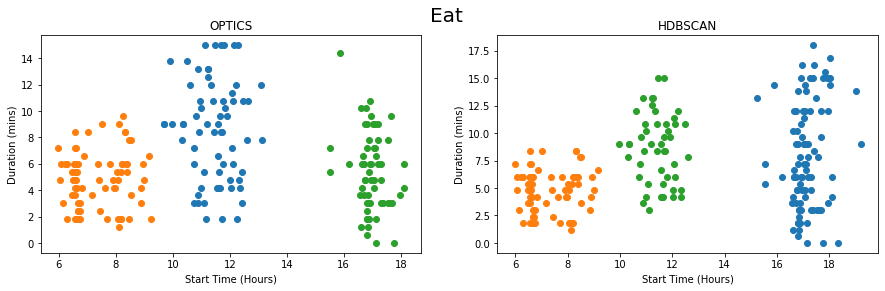

In [18]:
dataset = ['128','109', '124', '122']
plot_datasets(dataset)